In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping
from tensorflow.keras.utils import plot_model


In [ ]:
#Fetching Average Pooling Dataset

import os

# Specify the folder path
folder_path = "/content/drive/MyDrive/pooled_data/"

# Error handling: Check if folder exists
if not os.path.exists(folder_path):
    raise ValueError(f"Folder '{folder_path}' does not exist. Please provide a valid path.")

# Create an empty list to store the files
sample = []

# Iterate through files in the folder using os.listdir()
for filename in os.listdir(folder_path):
    # Check if it's a file (not a directory) using os.path.isfile()
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Construct the full path to the file
        full_path = os.path.join(folder_path, filename)

        data = pd.read_csv(full_path, header=None)

        # Process the data
        print(f"Processing file: {filename}")

        sample.append(data)

In [ ]:

labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust",
          "Happy", "Fear", "Neutral", "Sad", "Disgust"]*16


print(labels)


['Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad', 'Disgust', 'Happy', 'Fear', 'Neutral', 'Sad'

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(sample, labels, test_size=.2, random_state=42)

# KFold cross-validation loop
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cvscores = []  # To store evaluation metrics (e.g., accuracy)

for train_index, val_index in kfold.split(X_train):
  # Split the training data further for train and validation sets within each fold
  X_train_fold = [X_train[i] for i in train_index]
  X_val_fold = [X_train[i] for i in val_index]
  y_train_fold = [y_train[i] for i in train_index]
  y_val_fold = [y_train[i] for i in val_index]


X_train_fold = np.array(X_train_fold)
X_val_fold = np.array(X_val_fold)
y_train_fold = np.array(y_train_fold)
y_val_fold = np.array(y_val_fold)


In [ ]:
#SCaling
scaler = StandardScaler()
for x in X_train_fold:
  scaler.fit(x[:, 1:])

X_train_fold_scaled = []
for x in X_train_fold:
  X_train_fold_scaled.append(scaler.transform(x[:, 1:]))
X_train_fold_scaled = np.array(X_train_fold_scaled)

X_te = []
for x in X_test:
  X_te.append(scaler.transform(x[:, 1:]))
x_test = np.array(X_te)

X_val = []
for x in X_val_fold:
  X_val.append(scaler.transform(x[:, 1:]))
X_val_fold = np.array(X_val)





In [ ]:
print(X_train_fold_scaled.shape)
print(X_val_fold.shape)
print(x_test.shape)

(154, 62, 59399)
(38, 62, 59399)
(48, 62, 59399)


In [ ]:
#One Hot Encoding
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.array(y_train_fold).reshape(-1, 1))
y_train_fold_encoded = encoder.transform(np.array(y_train_fold).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))
y_val_fold = encoder.transform(np.array(y_val_fold).reshape(-1, 1))

In [ ]:
print(y_train_fold_encoded.shape)
print(y_test.shape)
print(y_val_fold.shape)

(154, 5)
(48, 5)
(38, 5)


In [ ]:
x_train = X_train_fold_scaled.reshape(X_train_fold_scaled.shape[0],X_train_fold_scaled.shape[1], X_train_fold_scaled.shape[2], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(x_train.shape[1],x_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(units=16, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=5, activation='sigmoid'))

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.AUC(),tf.keras.metrics.Precision()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 19797, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9898, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 9896, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 4948, 64)       0         
 g2D)                                                            
                                                                 
 time_distributed (TimeDist  (None, 3, 316672)         0         
 ributed)                                                        
                                                        

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, to_file='model.png')

In [ ]:

checkpoint = callbacks.ModelCheckpoint('RNN_padmodel_detect_emotional.h5', save_best_only=True, verbose=1, monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_delta=0.00001, verbose=1)
csv_logger = callbacks.CSVLogger('training.log')
callbacks_list = [checkpoint, reduce_lr, csv_logger, early_stopping]

In [ ]:
history =   model.fit(X_train_fold_scaled, y_train_fold_encoded, epochs=100, validation_data=(X_val_fold, y_val_fold), callbacks = callbacks_list).history

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.8617 - acc: 0.3073 - recall: 0.6406 - auc: 0.6192 - precision: 0.2668
Epoch 1: val_loss improved from inf to 1.50837, saving model to RNN_padmodel_detect_emotional.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 37s 6s/step - loss: 1.8617 - acc: 0.3073 - recall: 0.6406 - auc: 0.6192 - precision: 0.2668 - val_loss: 1.5084 - val_acc: 0.2500 - val_recall: 0.7500 - val_auc: 0.6464 - val_precision: 0.2951 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.4170 - acc: 0.4583 - recall: 0.7031 - auc: 0.7185 - precision: 0.2935
Epoch 2: val_loss did not improve from 1.50837
6/6 [==============================] - 32s 5s/step - loss: 1.4170 - acc: 0.4583 - recall: 0.7031 - auc: 0.7185 - precision: 0.2935 - val_loss: 1.5465 - val_acc: 0.2500 - val_recall: 0.7500 - val_auc: 0.6698 - val_precision: 0.3077 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.3955 - acc: 0.4844 - recall: 0.7188 - auc: 0.7323 - precision: 0.2974
Epoch 3: val_loss improved from 1.50837 to 1.44100, saving model to RNN_padmodel_detect_emotional.h5
6/6 [==============================] - 33s 6s/step - loss: 1.3955 - acc: 0.4844 - reca

In [ ]:
  cvscores=[]
  loss, fold_accuracy,a,a2,a1 = model.evaluate(X_val_fold, y_val_fold)
  cvscores.append(fold_accuracy)

# Print the average accuracy across all folds
print(f"K-Fold Cross-Validation Accuracy: {np.mean(cvscores)}")

2/2 [==============================] - 3s 757ms/step - loss: 0.6341 - acc: 0.8333 - recall: 0.9583 - auc: 0.9544 - precision: 0.4035
K-Fold Cross-Validation Accuracy: 0.8333333134651184


In [ ]:
loss,acc,rec,auc,pre=model.evaluate(x_test, y_test)


2/2 [==============================] - 2s 697ms/step - loss: 0.6341 - acc: 0.8333 - recall: 0.9583 - auc: 0.9544 - precision: 0.4035


In [ ]:

from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, output_dict=True)  # Convert one-hot labels to class labels

# Print the classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_classes))

# Access specific metrics
precision = report['accuracy']  # Overall accuracy
recall = report['weighted avg']['recall']  # Average recall
f1_score = report['weighted avg']['f1-score']  # Average F1-score

# Print specific metrics
print(f"Overall Accuracy: {precision}")
print(f"Average Recall: {recall}")
print(f"Average F1-Score: {f1_score}")

2/2 [==============================] - 3s 725ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00        10
           2       0.73      0.62      0.67        13
           3       0.83      0.62      0.71         8
           4       0.75      1.00      0.86         9

    accuracy                           0.83        48
   macro avg       0.84      0.85      0.84        48
weighted avg       0.83      0.83      0.83        48

Overall Accuracy: 0.8333333333333334
Average Recall: 0.8333333333333334
Average F1-Score: 0.8255135387488329


In [ ]:
print("accuracy:",acc)
print("precision:",pre)
print("recall:",rec)
print("Area under Curve:",auc)
f1 = 2*(pre*rec)/(pre+rec)

print("f1 score:",f1)


accuracy: 0.8333333134651184
precision: 0.4035087823867798
recall: 0.9583333134651184
Area under Curve: 0.9543728828430176
f1 score: 0.5679012414359259


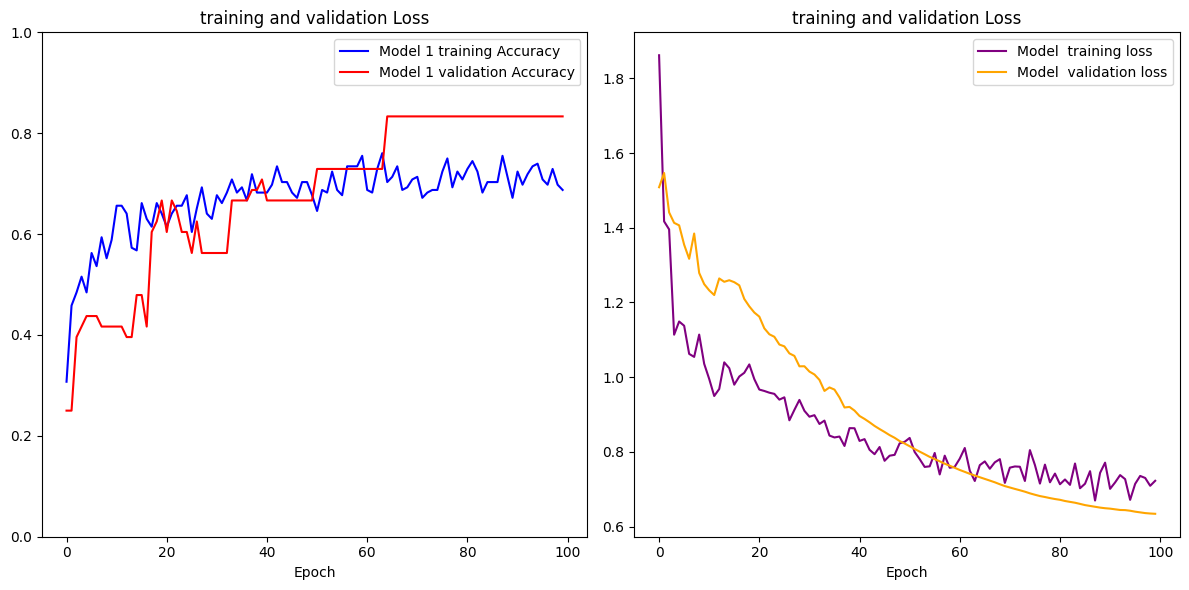

In [ ]:
model_train_loss = history['loss']
model_val_loss = history['val_loss']
model_train_acc = history['acc']
model_val_acc = history['val_acc']



# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_train_acc, label='Model 1 training Accuracy', color='blue')
plt.plot(model_val_acc, label='Model 1 validation Accuracy', color='red')

plt.title('training and validation Loss')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(model_train_loss, label='Model  training loss', color='purple')
plt.plot(model_val_loss, label='Model  validation loss', color='orange')

plt.title('training and validation Loss')
plt.xlabel('Epoch')

plt.legend()


plt.tight_layout()
plt.show()

<ipython-input-19-a544cdb3b153>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_values, palette='Set2')


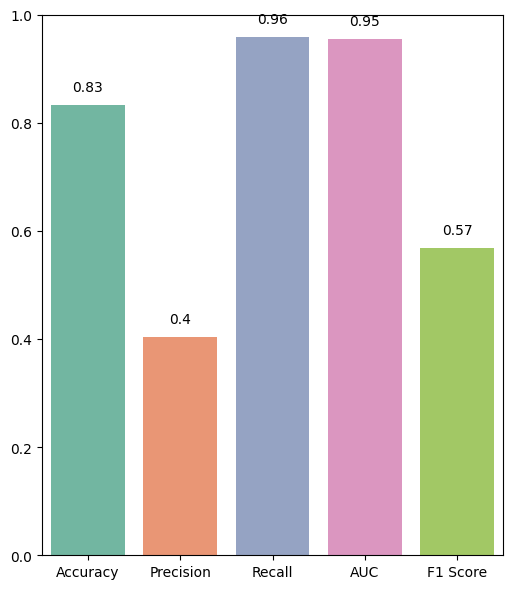

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the metrics and models
models = ['Accuracy','Precision','Recall','AUC','F1 Score']

accuracy_values = [acc,pre,rec,auc,f1]


# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_values, palette='Set2')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

# Add text labels for accuracy values
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')



plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()

2/2 [==============================] - 2s 701ms/step


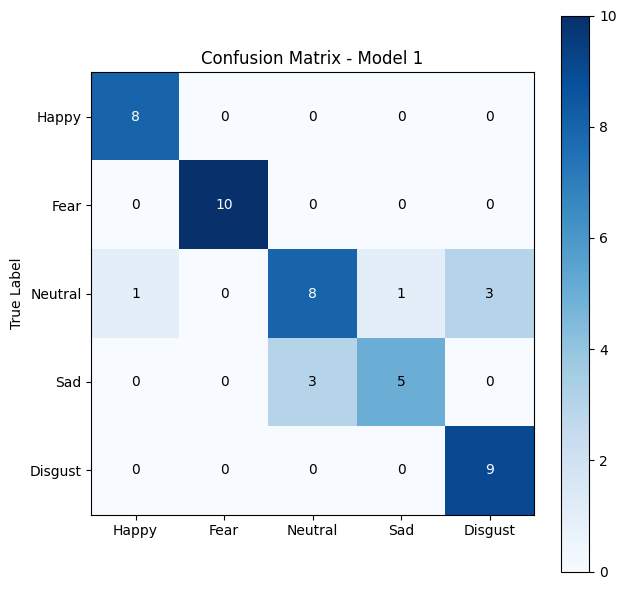

In [ ]:
#model1
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels, title):


  labels = ["Happy", "Fear", "Neutral", "Sad", "Disgust"]

  plt.figure(figsize=(12, 6))  # Adjust figure size as needed

  # Plot confusion matrix for model 1 on the left
  plt.subplot(1, 2, 1)
  plt.imshow(cm1, interpolation='nearest', cmap='Blues')
  plt.title("Confusion Matrix - Model 1")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels)
  plt.yticks(tick_marks, labels)

  # Normalize confusion matrix values to display percentages instead of raw counts

  thresh = cm1.max() / 2.
  for i in range(len(cm1)):
    for j in range(len(cm1[0])):
      plt.text(j, i, format(cm1[i, j]),  # Display percentages with 2 decimal places
               ha="center", va="center",
               color="white" if cm1[i, j] > thresh else "black")

  # Plot confusion matrix for model 2 on the right

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.show()

# Calculate confusion matrices
y_pred1 = model.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
cm1 = confusion_matrix(y_test.argmax(axis=1), y_pred_classes1)

# Create the side-by-side confusion matrix plot
plot_confusion_matrix(cm1, list(set(y_test.argmax(axis=1))),"Confusion Matrix - Model 1")